# Classification Methods

- TA: WANG Zhiwei, HKUST

- Date: 2022-10-18

In [1]:
set.seed(20221016)

In this tutorial, we will introduce four widely-used classification methods and how to use them in R programming language.
- Logistic regression
- LDA
- QDA
- KNN

We will also introduce the receiver operating characteristic curve (ROC curve) to evaluate the performances of the methods.

We use `Smarket` data from the `ISLR2` package to demonstrate.

In [2]:
library(ISLR2)

# We first take a look at the data
dim(Smarket)
head(Smarket)
summary(Smarket)

[1] 1250    9

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

## Logistic regression
- we will fit a logistic regression model in order to predict Direction using `Lag1` through `Lag5` and `Volume`. 
- The `glm()` function fits **generalized linear models**, a class of models that includes **logistic regression**. 
- The syntax of `glm()` function is similar to that of `lm()`, except that we must pass in linear model the argument `family = binomial` in order to tell `R` to run a logistic regression rather than some other type of generalized linear model.

In [3]:
# Logistic Regression
glm.fits <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)

In [4]:
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [5]:
coef(glm.fits)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [6]:
summary(glm.fits)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


- The `predict()` function can be used to predict the probability that the market will go up, given values of the predictors. By default it returns the logit values, e.g., $log(\frac{Pr(Y = 1|X)}{Pr(Y = 0|X)})$.

In [7]:
glm.y <- predict(glm.fits)
glm.y[1:10]

1           2           3           4           5           6 
 0.02833843 -0.07416246 -0.07548047  0.06090825  0.04313134  0.02782764 
          7           8           9          10 
-0.02939862  0.03692083  0.07048327 -0.04465630

- The `type = "response"` option tells R to output probabilities of the form $Pr(Y = 1|X)$.

In [8]:
glm.probs <- predict(glm.fits, type = "response")
glm.probs[1:10]

log(glm.probs[1:10] / (1 - glm.probs[1:10])) # logit, the same as the output of the above cell

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

1           2           3           4           5           6 
 0.02833843 -0.07416246 -0.07548047  0.06090825  0.04313134  0.02782764 
          7           8           9          10 
-0.02939862  0.03692083  0.07048327 -0.04465630

- We can check the prediction performance by producing a table and compute the accuracy.

In [9]:
# Predicted value
glm.pred <- rep("Down", 1250)
glm.pred[glm.probs > .5] <- "Up"

glm.pred[1:6]

[1] "Up"   "Down" "Down" "Up"   "Up"   "Up"

In [10]:
# True value
Smarket$Direction[1:6]

[1] Up   Up   Down Up   Up   Up  
Levels: Down Up

In [11]:
attach(Smarket)

table(data.frame(Pred = glm.pred, True = Direction))

(507 + 145) / 1250
mean(glm.pred == Direction)

      True
Pred   Down  Up
  Down  145 141
  Up    457 507

[1] 0.5216

[1] 0.5216

- The accuracy only replects the performance under threshold 0.5. We can construct ROC curve to evaluate the general performance under various thresholding value.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = Down, case = Up

Setting direction: controls < cases




Call:
roc.default(response = Direction, predictor = glm.probs, plot = T)

Data: glm.probs in 602 controls (Direction Down) < 648 cases (Direction Up).
Area under the curve: 0.5387

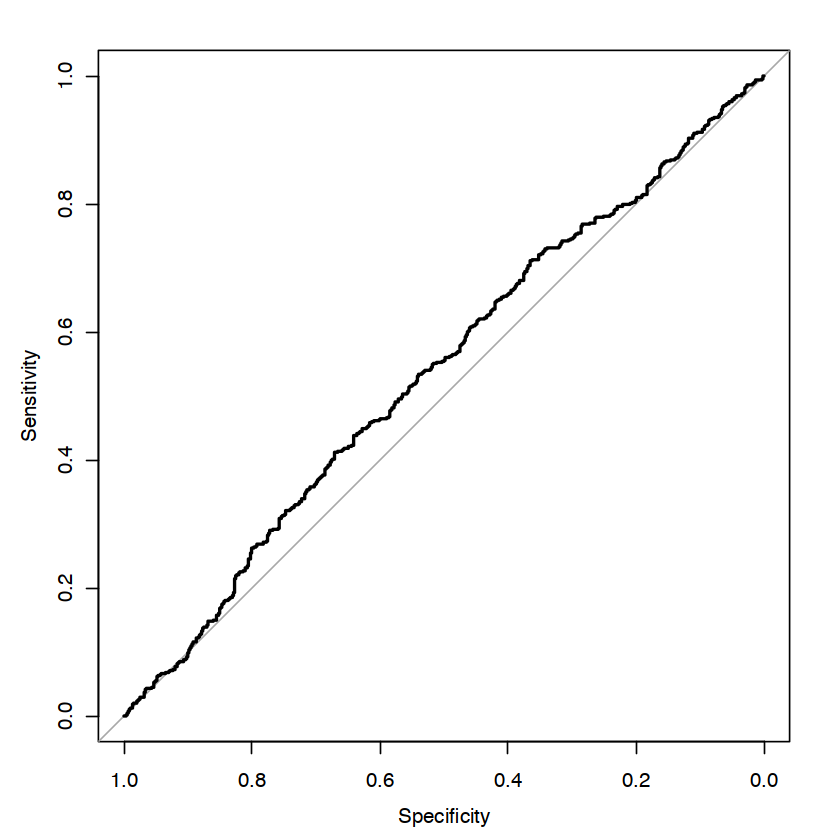

In [12]:
library(pROC)
roc(Direction, glm.probs, plot = T)

- At first glance, it looks a little bit better than random guess. But this result is evaluated on the training set.
- Intuitively, the test result will be worse due to the overfitting rpoblem.
- Let's fit the model using two independent datasets: fit the model using observations from 2001-2004; test the results using a held-out data of obserations from 2005.

In [13]:
# Use Year to split the dataset
train <- (Year < 2005)

# Test set
Smarket.2005 <- Smarket[!train, ]
dim(Smarket.2005)

# Response
Direction.2005 <- Direction[!train]

[1] 252   9

In [14]:
# Fit the model using training set
glm.fits <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, 
                data = Smarket, 
                family = binomial, 
                subset = train)

# Predict the probabilities based on the test set
glm.probs <- predict(glm.fits, Smarket.2005, type = "response")

# Make prediction based on the probabilities
glm.pred <- rep("Down", 252)
glm.pred[glm.probs > .5] <- "Up"

# Check accuracy
table(data.frame(Pred = glm.pred, True = Direction.2005))
cat("The accuracy is now ", mean(glm.pred == Direction.2005), ".\n")
cat("The error rate is now ", mean(glm.pred != Direction.2005), ".\n")

      True
Pred   Down Up
  Down   77 97
  Up     34 44

The accuracy is now  0.4801587 .
The error rate is now  0.5198413 .


Setting levels: control = Down, case = Up

Setting direction: controls < cases




Call:
roc.default(response = Direction.2005, predictor = glm.probs,     plot = TRUE)

Data: glm.probs in 111 controls (Direction.2005 Down) < 141 cases (Direction.2005 Up).
Area under the curve: 0.5197

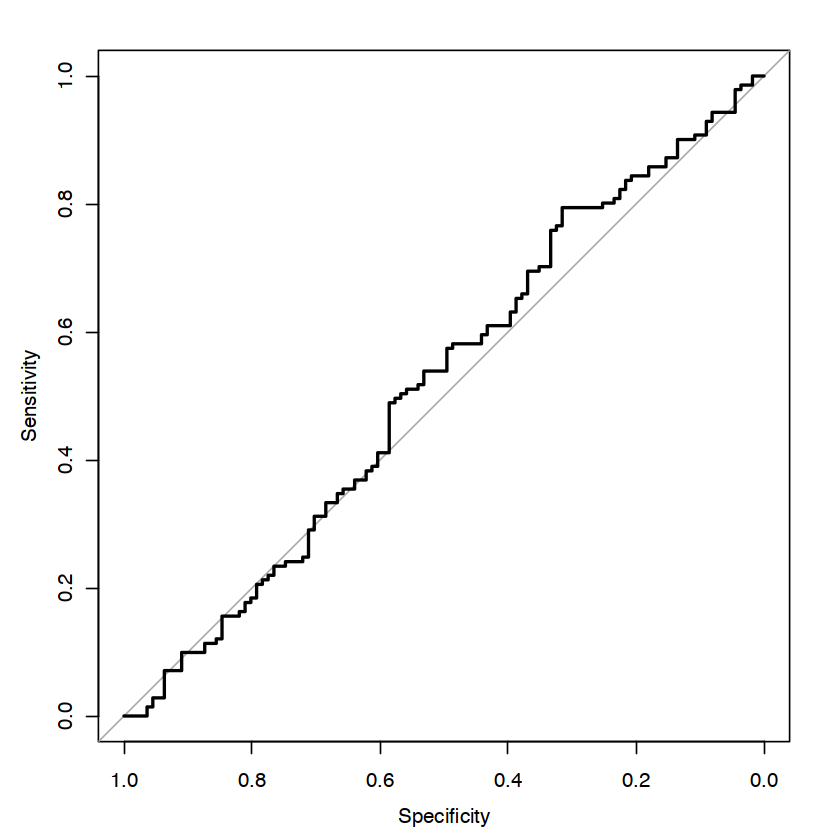

In [15]:
roc(Direction.2005, glm.probs, plot = TRUE)

- Now, the test error rate is $52\%$, which is worse than random guessing!
- Prediction AUC is $0.52$, slightly better than random guess but worse than training AUC (as expected).
- We find descrepency between AUC and prediction accuracy, because the former accounts for the entire cutoff range.

- Of course this result is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance.
- We recall that the logistic regression model had very underwhelming pvalues associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to `Lag1`.
- Perhaps by removing the variables that appear not to be helpful in predicting `Direction`, we can obtain a more effective model.
- Below we have refit the logistic regression using just `Lag1` and `Lag2`, which seemed to have the highest predictive power in the original logistic regression model.

In [16]:
glm.fits <- glm(Direction ~ Lag1 + Lag2, 
                data = Smarket, 
                family = binomial, 
                subset = train)

glm.probs <- predict(glm.fits, Smarket.2005, type = "response")

glm.pred <- rep("Down", 252)
glm.pred[glm.probs > .5] <- "Up"

table(data.frame(Pred = glm.pred, True = Direction.2005))
mean(glm.pred == Direction.2005)

      True
Pred   Down  Up
  Down   35  35
  Up     76 106

[1] 0.5595238

Setting levels: control = Down, case = Up

Setting direction: controls < cases




Call:
roc.default(response = Direction.2005, predictor = glm.probs,     plot = TRUE)

Data: glm.probs in 111 controls (Direction.2005 Down) < 141 cases (Direction.2005 Up).
Area under the curve: 0.5584

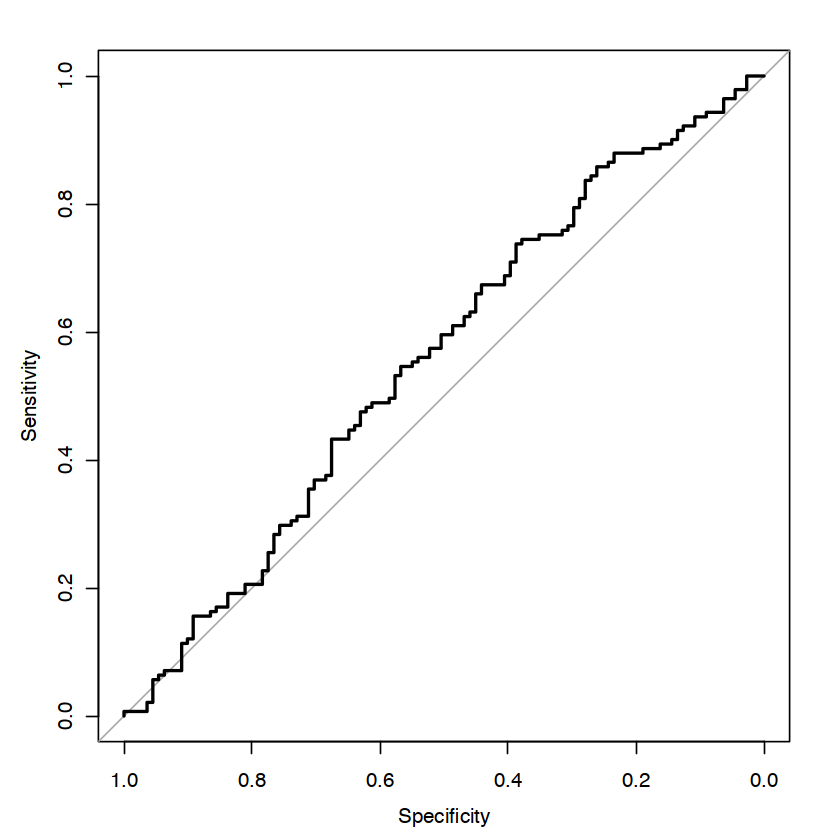

In [17]:
roc(Direction.2005, glm.probs, plot = TRUE)

## LDA
In R, we fit an LDA modelusing the `lda()` function, which is part of the `MASS` library. 
- Notice that the  syntax for the `lda()` function is identical to that of `lm()`, and to that of `glm()` except for the absence of the `family` option.

In [18]:
library(MASS)

# Linear Discriminant Analysis
lda.fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
lda.fit


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

- Prior probabilities: $\pi_k$.
- Group means: $\mu_k$.
- Coefficients: discrimination function $\mu^T \Sigma^{-1} x$ is linear on $x$.

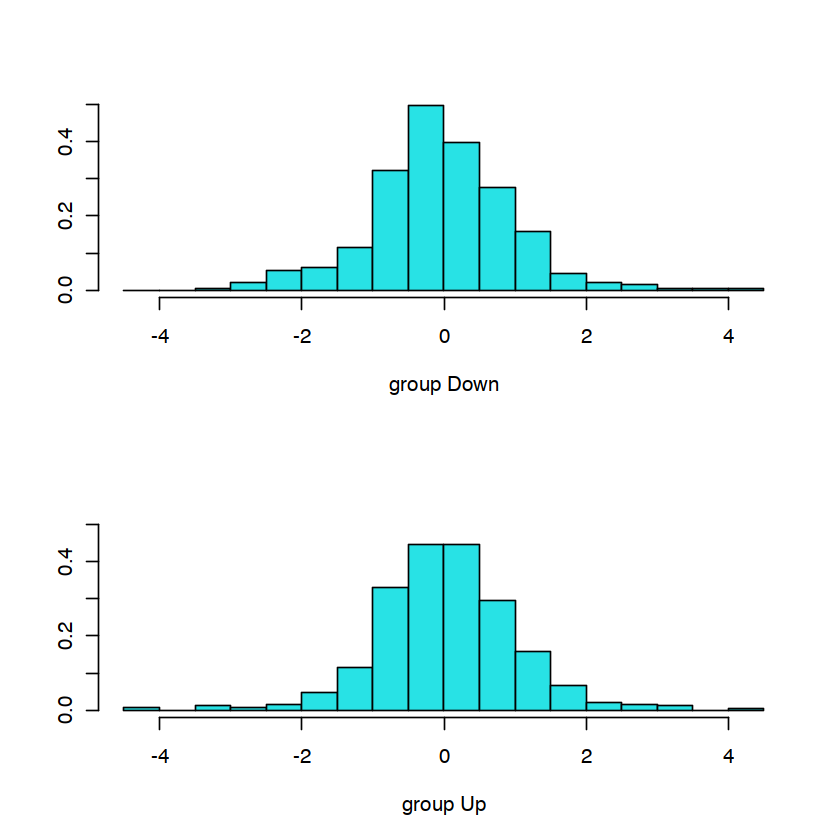

In [19]:
plot(lda.fit)

The distributions of the two classes are very similar.

In [20]:
sum(Smarket[train, "Direction"] == "Up") / sum(train)
sum(Smarket[train, "Direction"] == "Down") / sum(train)

[1] 0.508016

[1] 0.491984

- The LDA output indicates that $\pi_1 = 0.492$ and $\pi_2 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down. 
- It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimate of $\mu_k$. 
- These suggest that there is a tendency for the previous 2 days returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines.

In [21]:
lda.pred <- predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

- The `predict()` function returns a list with three elements. We focus on the first two.
- The first element, `class`, contains LDA’s predictions about the movement of the market.
- The second element, `posterior`, is a matrix whose $k$-th column contains the posterior probability that the corresponding observation belongs to the $k$-th class. 

In [22]:
head(lda.pred$class) # This prediction uses 0.5 as the posterior threshold
head(lda.pred$posterior)

[1] Up Up Up Up Up Up
Levels: Down Up

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438


In [23]:
lda.class <- lda.pred$class
table(data.frame(Pred = lda.class, True = Direction.2005))

      True
Pred   Down  Up
  Down   35  35
  Up     76 106

In [24]:
cat("The prediction accuracy is", mean(lda.class == Direction.2005), "\n")

The prediction accuracy is 0.5595238 


- The prediction performance is the same as logistic regression.

Setting levels: control = Down, case = Up

Setting direction: controls < cases




Call:
roc.default(response = Direction.2005, predictor = lda.pred$posterior[,     "Up"], plot = TRUE)

Data: lda.pred$posterior[, "Up"] in 111 controls (Direction.2005 Down) < 141 cases (Direction.2005 Up).
Area under the curve: 0.5584

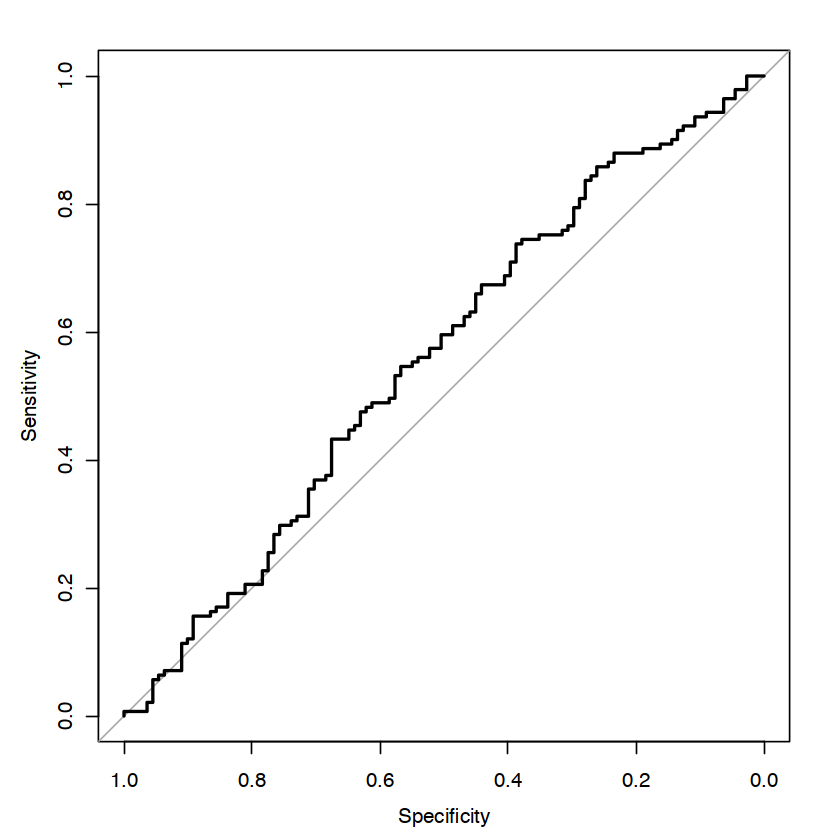

In [25]:
roc(Direction.2005, lda.pred$posterior[, "Up"], plot = TRUE)

## QDA
We will now fit a QDA model to the Smarket data. QDA is implemented in R using the `qda()` function, which is also part of the `MASS` library. The syntax is identical to that of `lda()`.

In [26]:
# Quadratic Discriminant Analysis
qda.fit <- qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [27]:
qda.pred <- predict(qda.fit, Smarket.2005)
table(data.frame(Pred = qda.pred$class, True = Direction.2005))
cat("The prediction accuracy is now ", mean(qda.pred$class == Direction.2005), "!\n", sep = "")

      True
Pred   Down  Up
  Down   30  20
  Up     81 121

The prediction accuracy is now 0.5992063!


Setting levels: control = Down, case = Up

Setting direction: controls < cases




Call:
roc.default(response = Direction.2005, predictor = qda.pred$posterior[,     "Up"], plot = TRUE)

Data: qda.pred$posterior[, "Up"] in 111 controls (Direction.2005 Down) < 141 cases (Direction.2005 Up).
Area under the curve: 0.562

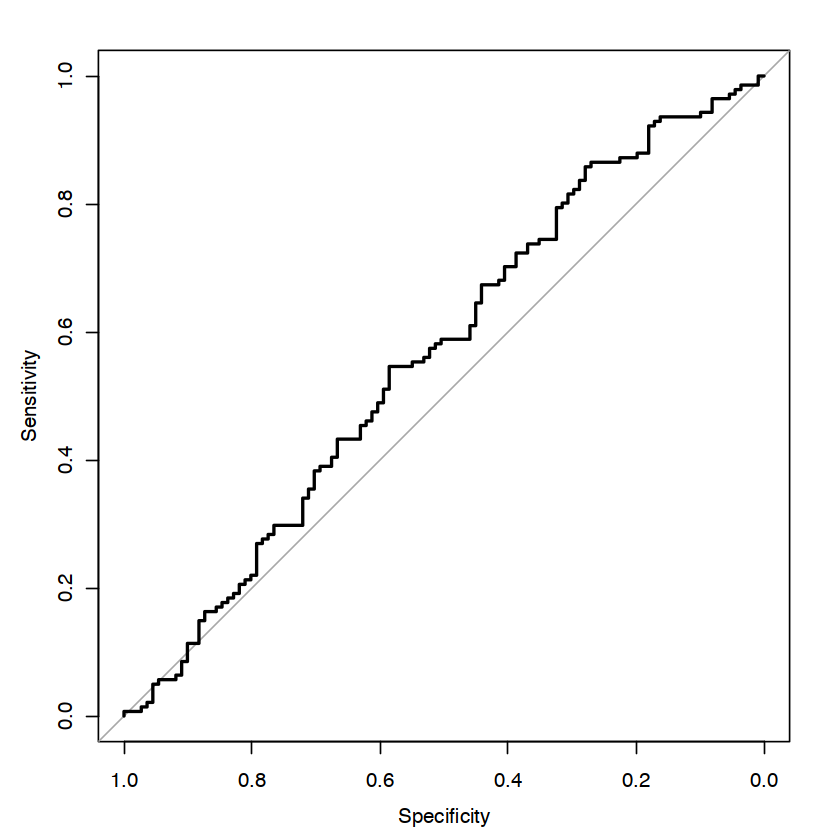

In [28]:
roc(Direction.2005, qda.pred$posterior[, "Up"], plot = TRUE)

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite
hard to model accurately.
- This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. 
- However, it would be better to evaluate this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## K-Nearest Neighbors

In [29]:
library(class)

train.X <- cbind(Lag1, Lag2)[train, ]
test.X <- cbind(Lag1, Lag2)[!train, ]
train.Direction <- Direction[train]

set.seed(1) # Set seed for tied values
knn.pred <- knn(train.X, test.X, train.Direction, k = 1)

table(data.frame(Pred = knn.pred, True = Direction.2005))
cat("The prediction accuracy is", mean(knn.pred == Direction.2005), "\n")

      True
Pred   Down Up
  Down   43 58
  Up     68 83

The prediction accuracy is 0.5 


# Exercise

- Try to apply the KNN approach to the `Caravan` data set, which is part of the `ISLR` library. This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals.

- Use `Purchase` as response.

In [30]:
# An Application to Caravan Insurance Data
dim(Caravan)
head(Caravan)

[1] 5822   86

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,No
6,23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,No


In [31]:
attach(Caravan)

standardized.X <- scale(Caravan[, -86])
var(Caravan[, 1])
var(Caravan[, 2])
var(standardized.X[, 1])
var(standardized.X[, 2])
test <- 1:1000
train.X <- standardized.X[-test, ]
test.X <- standardized.X[test, ]
train.Y <- Purchase[-test]
test.Y <- Purchase[test]
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Y, k = 1)
mean(test.Y != knn.pred)
mean(test.Y != "No")
table(knn.pred, test.Y)
9 / (68 + 9)
knn.pred <- knn(train.X, test.X, train.Y, k = 3)
table(knn.pred, test.Y)
5 / 26
knn.pred <- knn(train.X, test.X, train.Y, k = 5)
table(knn.pred, test.Y)
4 / 15
glm.fits <- glm(Purchase ~ ., data = Caravan, family = binomial, subset = -test)
glm.probs <- predict(glm.fits, Caravan[test, ], type = "response")
glm.pred <- rep("No", 1000)
glm.pred[glm.probs > .5] <- "Yes"
table(glm.pred, test.Y)
glm.pred <- rep("No", 1000)
glm.pred[glm.probs > .25] <- "Yes"
table(glm.pred, test.Y)
11 / (22 + 11)

[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

[1] 0.118

[1] 0.059

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

[1] 0.1168831

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

[1] 0.1923077

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

[1] 0.2666667

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

[1] 0.3333333